In [1]:
using LinearAlgebra

k = 4

4

In [2]:
function obj(eta, theta)
    mat = zeros(2,2)
    b = theta[2]
    a = theta[1]
    for i in 1:k
        m0 = zeros(2)
        s = eta[i]
        w = eta[i+k]
        m0[1] = b
        m0[2] = -s+a
        p = 1/(1+exp(-b*(s-a))) 
        mat = mat + w * p*(1-p) * m0*m0' 
    end
    if det(mat) < 10.0^-6
        return Inf
    else
        return -log(det(mat))
    end
end

obj (generic function with 1 method)

In [3]:
obj([-0.128092, 2.59759, 1.12599, 4.0, 0.235021, 0.211896, 0.55308, 3.14762e-6], [2.5, 1.0])

4.013547533693476

In [4]:
x = 0:0.01:2.5
y = 1:0.01:3
f(x,y) = obj([-0.128092, 2.59759, 1.12599, 4.0, 0.235021, 0.211896, 0.55308, 3.14762e-6], [x,y])

f (generic function with 1 method)

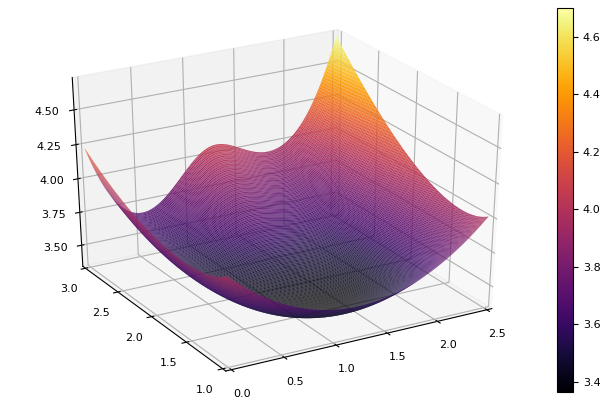

In [5]:
using Plots; pyplot()
plot(x,y,f,st=:surface,camera=(-30,30))

In [6]:
M = -Inf
m = Inf
for i in 1:length(x)
    for j in 1:length(y)
        fxy = f(x[i],y[j])
        M = max(M, fxy)
        m = min(m, fxy)
    end
end
[M,m]

2-element Array{Float64,1}:
 4.700275055080702
 3.364898136464811